# EDA
Exploratory data analysis of stainless steel behaviour against corrosion based on steel composition

### Imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math

In [2]:
df = pd.read_csv("Dataset No.1.csv")

In [3]:
df.head()

,ASTM Material,C,Mn,Si,P,S,Cr,Mo,Ni,N,...,Sulfuric acid (H2SO4),Nitric acid (HNO3),Hydrocloric acid (HCl),Citric acid(HOC(CH2COOH)2COOH.H2O,KHSO4,KNO3,MgCl2.6H2O,Temperature,Behavior,Pitting_label
0,403,0.15,1.00,0.5,0.040,0.03,11.5,0.0,0.60,0.0,...,0.0,0,0.0,0,0,0,0,20.0,Poor,0
1,405,0.08,1.00,1.0,0.040,0.03,11.5,0.0,0.60,0.0,...,0.0,0,0.0,0,0,0,0,20.0,Poor,0
2,S41050,0.04,1.00,1.0,0.045,0.03,10.5,0.0,0.60,0.1,...,0.0,0,0.0,0,0,0,0,20.0,Poor,0
3,416,0.15,1.25,1.0,0.060,0.35,12.0,0.0,0.00,0.0,...,0.0,0,0.0,0,0,0,0,20.0,Poor,0
4,410,0.15,1.00,1.0,0.040,0.03,11.5,0.0,0.75,0.0,...,0.0,0,0.0,0,0,0,0,20.0,Poor,0


### General Analysis

In [4]:
df.shape, df.columns, df.dtypes

((4019, 31),
 Index(['ASTM Material', 'C', 'Mn', 'Si', 'P', 'S', 'Cr', 'Mo', 'Ni', 'N', 'Ti',
        'Nb ', 'Al', 'Fe balance (%)', 'Formic acid (HCOOH)',
        'Ammonium chloride(NH4Cl)', 'Acetic acid(CH3COOH)',
        'Potasium Hydroxide (KOH)', 'Lactic acid ', 'oxalic acid (COOH)2.2H2O',
        'Phosphric acid (H3PO4)', 'Sulfuric acid (H2SO4)', 'Nitric acid (HNO3)',
        'Hydrocloric acid (HCl)', 'Citric acid(HOC(CH2COOH)2COOH.H2O', 'KHSO4',
        'KNO3', 'MgCl2.6H2O', 'Temperature', 'Behavior', 'Pitting_label'],
       dtype='object'),
 ASTM Material                         object
 C                                    float64
 Mn                                   float64
 Si                                   float64
 P                                    float64
 S                                    float64
 Cr                                   float64
 Mo                                   float64
 Ni                                   float64
 N                            

In [5]:
df.isnull().sum()

ASTM Material                        0
C                                    0
Mn                                   0
Si                                   0
P                                    0
S                                    0
Cr                                   0
Mo                                   0
Ni                                   0
N                                    0
Ti                                   0
Nb                                   0
Al                                   0
Fe balance (%)                       0
Formic acid (HCOOH)                  0
Ammonium chloride(NH4Cl)             0
Acetic acid(CH3COOH)                 0
Potasium Hydroxide (KOH)             0
Lactic acid                          0
oxalic acid (COOH)2.2H2O             0
Phosphric acid (H3PO4)               0
Sulfuric acid (H2SO4)                0
Nitric acid (HNO3)                   0
Hydrocloric acid (HCl)               0
Citric acid(HOC(CH2COOH)2COOH.H2O    0
KHSO4                    

In [6]:
df.describe()

,C,Mn,Si,P,S,Cr,Mo,Ni,N,Ti,...,Phosphric acid (H3PO4),Sulfuric acid (H2SO4),Nitric acid (HNO3),Hydrocloric acid (HCl),Citric acid(HOC(CH2COOH)2COOH.H2O,KHSO4,KNO3,MgCl2.6H2O,Temperature,Pitting_label
count,4019.000000,4019.000000,4019.000000,4019.000000,4019.000000,4019.000000,4019.000000,4019.000000,4019.000000,4019.000000,...,4019.000000,4019.000000,4019.000000,4019.000000,4019.000000,4019.000000,4019.000000,4019.000000,4019.000000,4019.000000
mean,0.115924,1.530132,0.861085,0.047606,0.056569,15.830430,0.662914,5.206544,0.046387,0.067584,...,6.190097,14.746952,7.520776,0.008460,1.455088,0.117940,0.634486,0.338393,71.172083,0.042299
std,0.189390,0.487928,0.143499,0.026977,0.089388,2.783667,0.990280,4.143184,0.048159,0.220281,...,20.470819,27.343130,18.652403,0.064493,7.244205,1.088665,5.103022,2.889184,51.278671,0.201296
min,0.030000,1.000000,0.500000,0.030000,0.020000,10.500000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,0.000000
25%,0.030000,1.000000,0.750000,0.040000,0.030000,15.000000,0.000000,0.750000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,0.000000
50%,0.080000,2.000000,0.750000,0.045000,0.030000,16.000000,0.000000,6.000000,0.030000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.000000,0.000000
75%,0.120000,2.000000,1.000000,0.045000,0.030000,17.500000,1.000000,9.000000,0.100000,0.000000,...,0.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,101.000000,0.000000
max,1.200000,2.000000,1.000000,0.200000,0.350000,23.000000,3.000000,11.000000,0.100000,0.900000,...,100.000000,98.000000,99.000000,0.500000,50.000000,15.000000,50.000000,30.000000,335.000000,1.000000


### Plots

In [7]:
# sns.pairplot(df)

In [8]:
# Exclude "Behavior" from the loop
columns_to_plot = [col for col in df.columns if not col in ["Behavior", "ASTM Material"]]

In [9]:
df["Behavior"].unique()

array(['Poor', 'Good', 'Resistant', 'Severe'], dtype=object)

In [10]:
behavior_order = ["Severe", "Poor", "Good", "Resistant"]

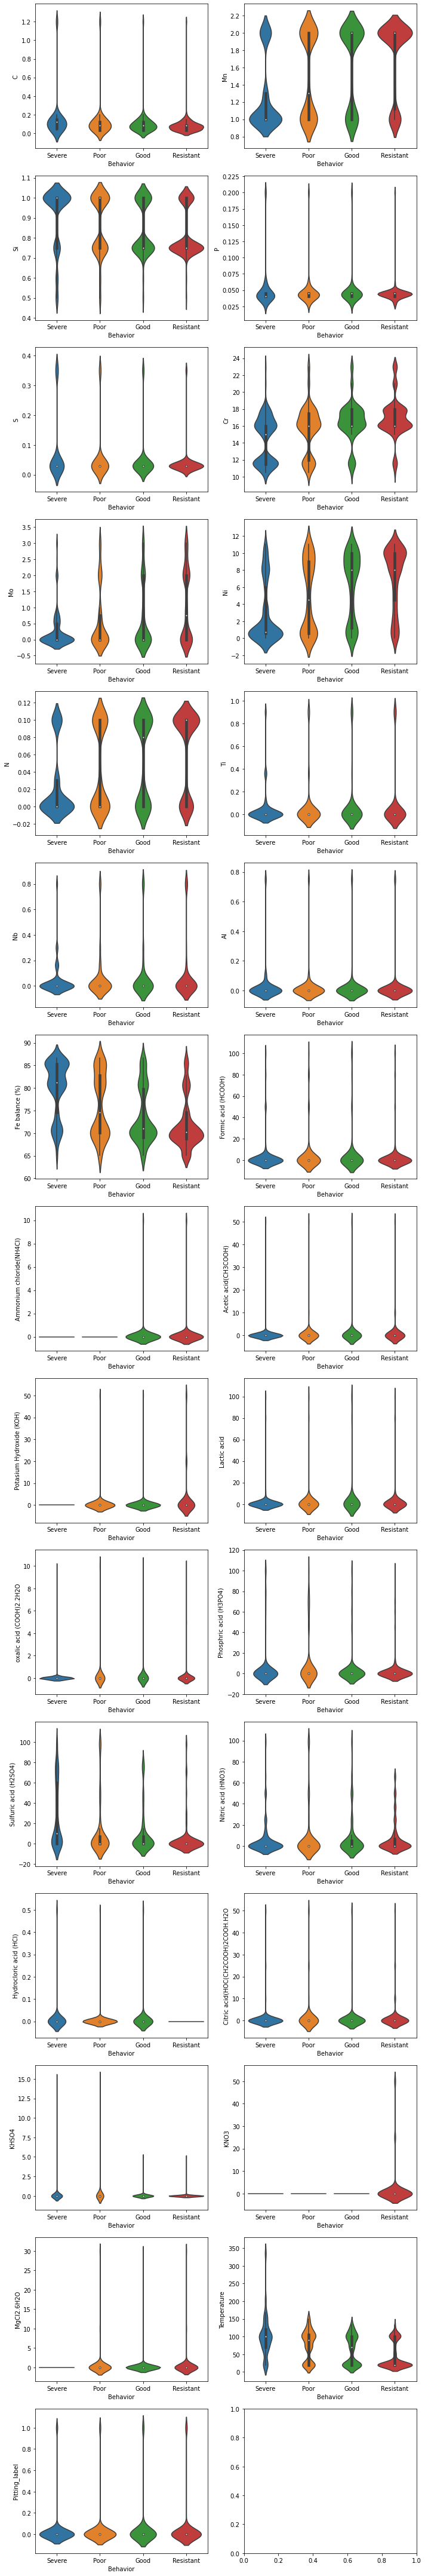

In [11]:
# Set up the grid
rows = (math.ceil(len(columns_to_plot)/2))
grid_size = (rows, 2)
fig, axes = plt.subplots(*grid_size, figsize=(10, 4*rows))

# Loop through the columns and create violin plots
for i, col in enumerate(columns_to_plot):
    # print(col)
    sns.violinplot(data=df, x="Behavior", y=col, order = behavior_order, ax=axes[i//2][i%2])

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


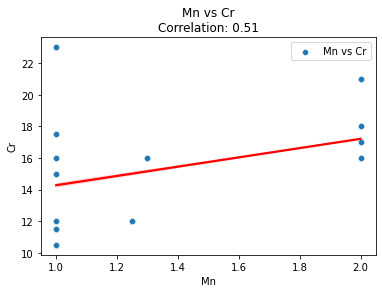

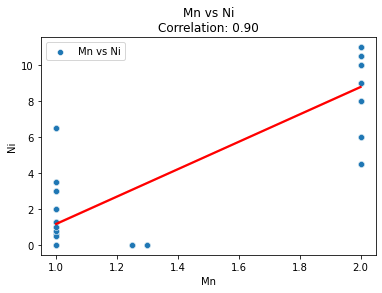

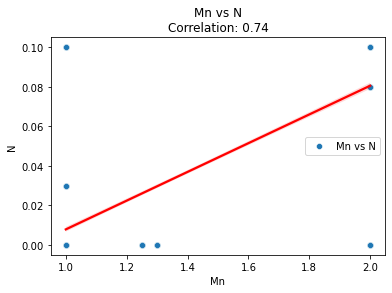

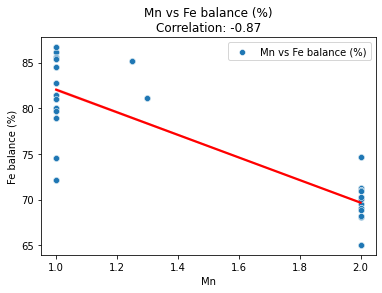

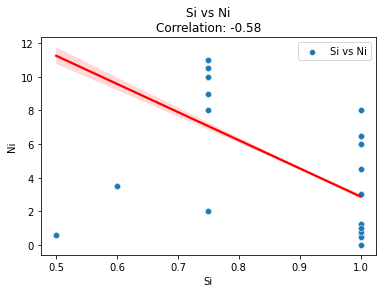

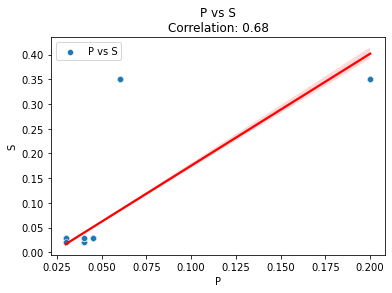

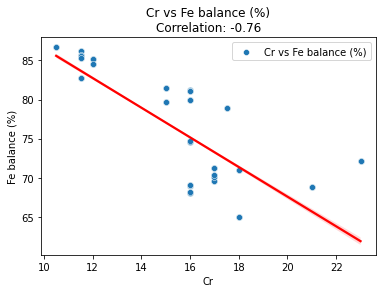

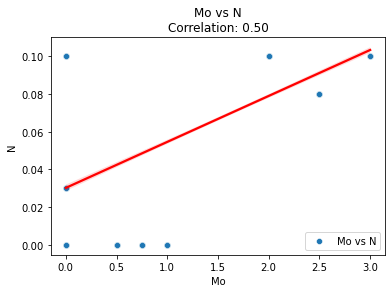

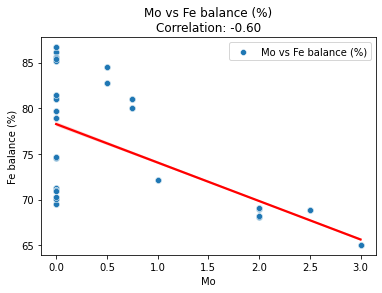

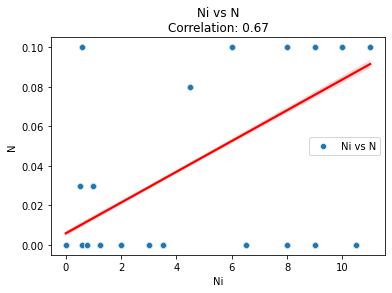

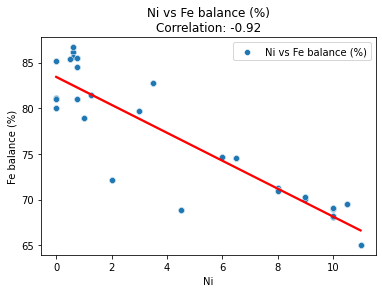

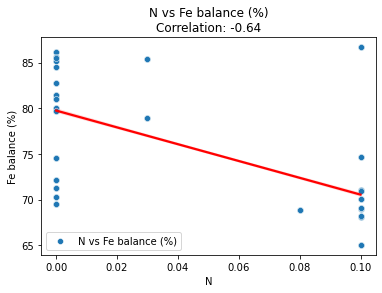

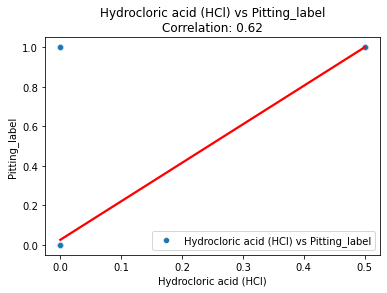

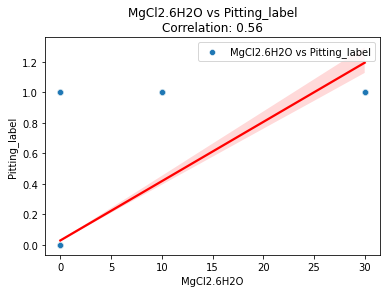

In [26]:

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Set the correlation magnitude threshold
correlation_threshold = 0.5

# Iterate through the correlation matrix
for i, col1 in enumerate(columns_to_plot):
    for j, col2 in enumerate(columns_to_plot):
        if i < j and abs(correlation_matrix.loc[col1, col2]) > correlation_threshold:
            # Scatter plot for columns with correlation above the threshold
            sns.scatterplot(x=col1, y=col2, data=df, label=f"{col1} vs {col2}")
            
            # Add a correlation line
            sns.regplot(x=col1, y=col2, data=df, scatter=False, color='red')
            
            plt.title(f"{col1} vs {col2}\nCorrelation: {correlation_matrix.loc[col1, col2]:.2f}")

            plt.legend()
            plt.show()


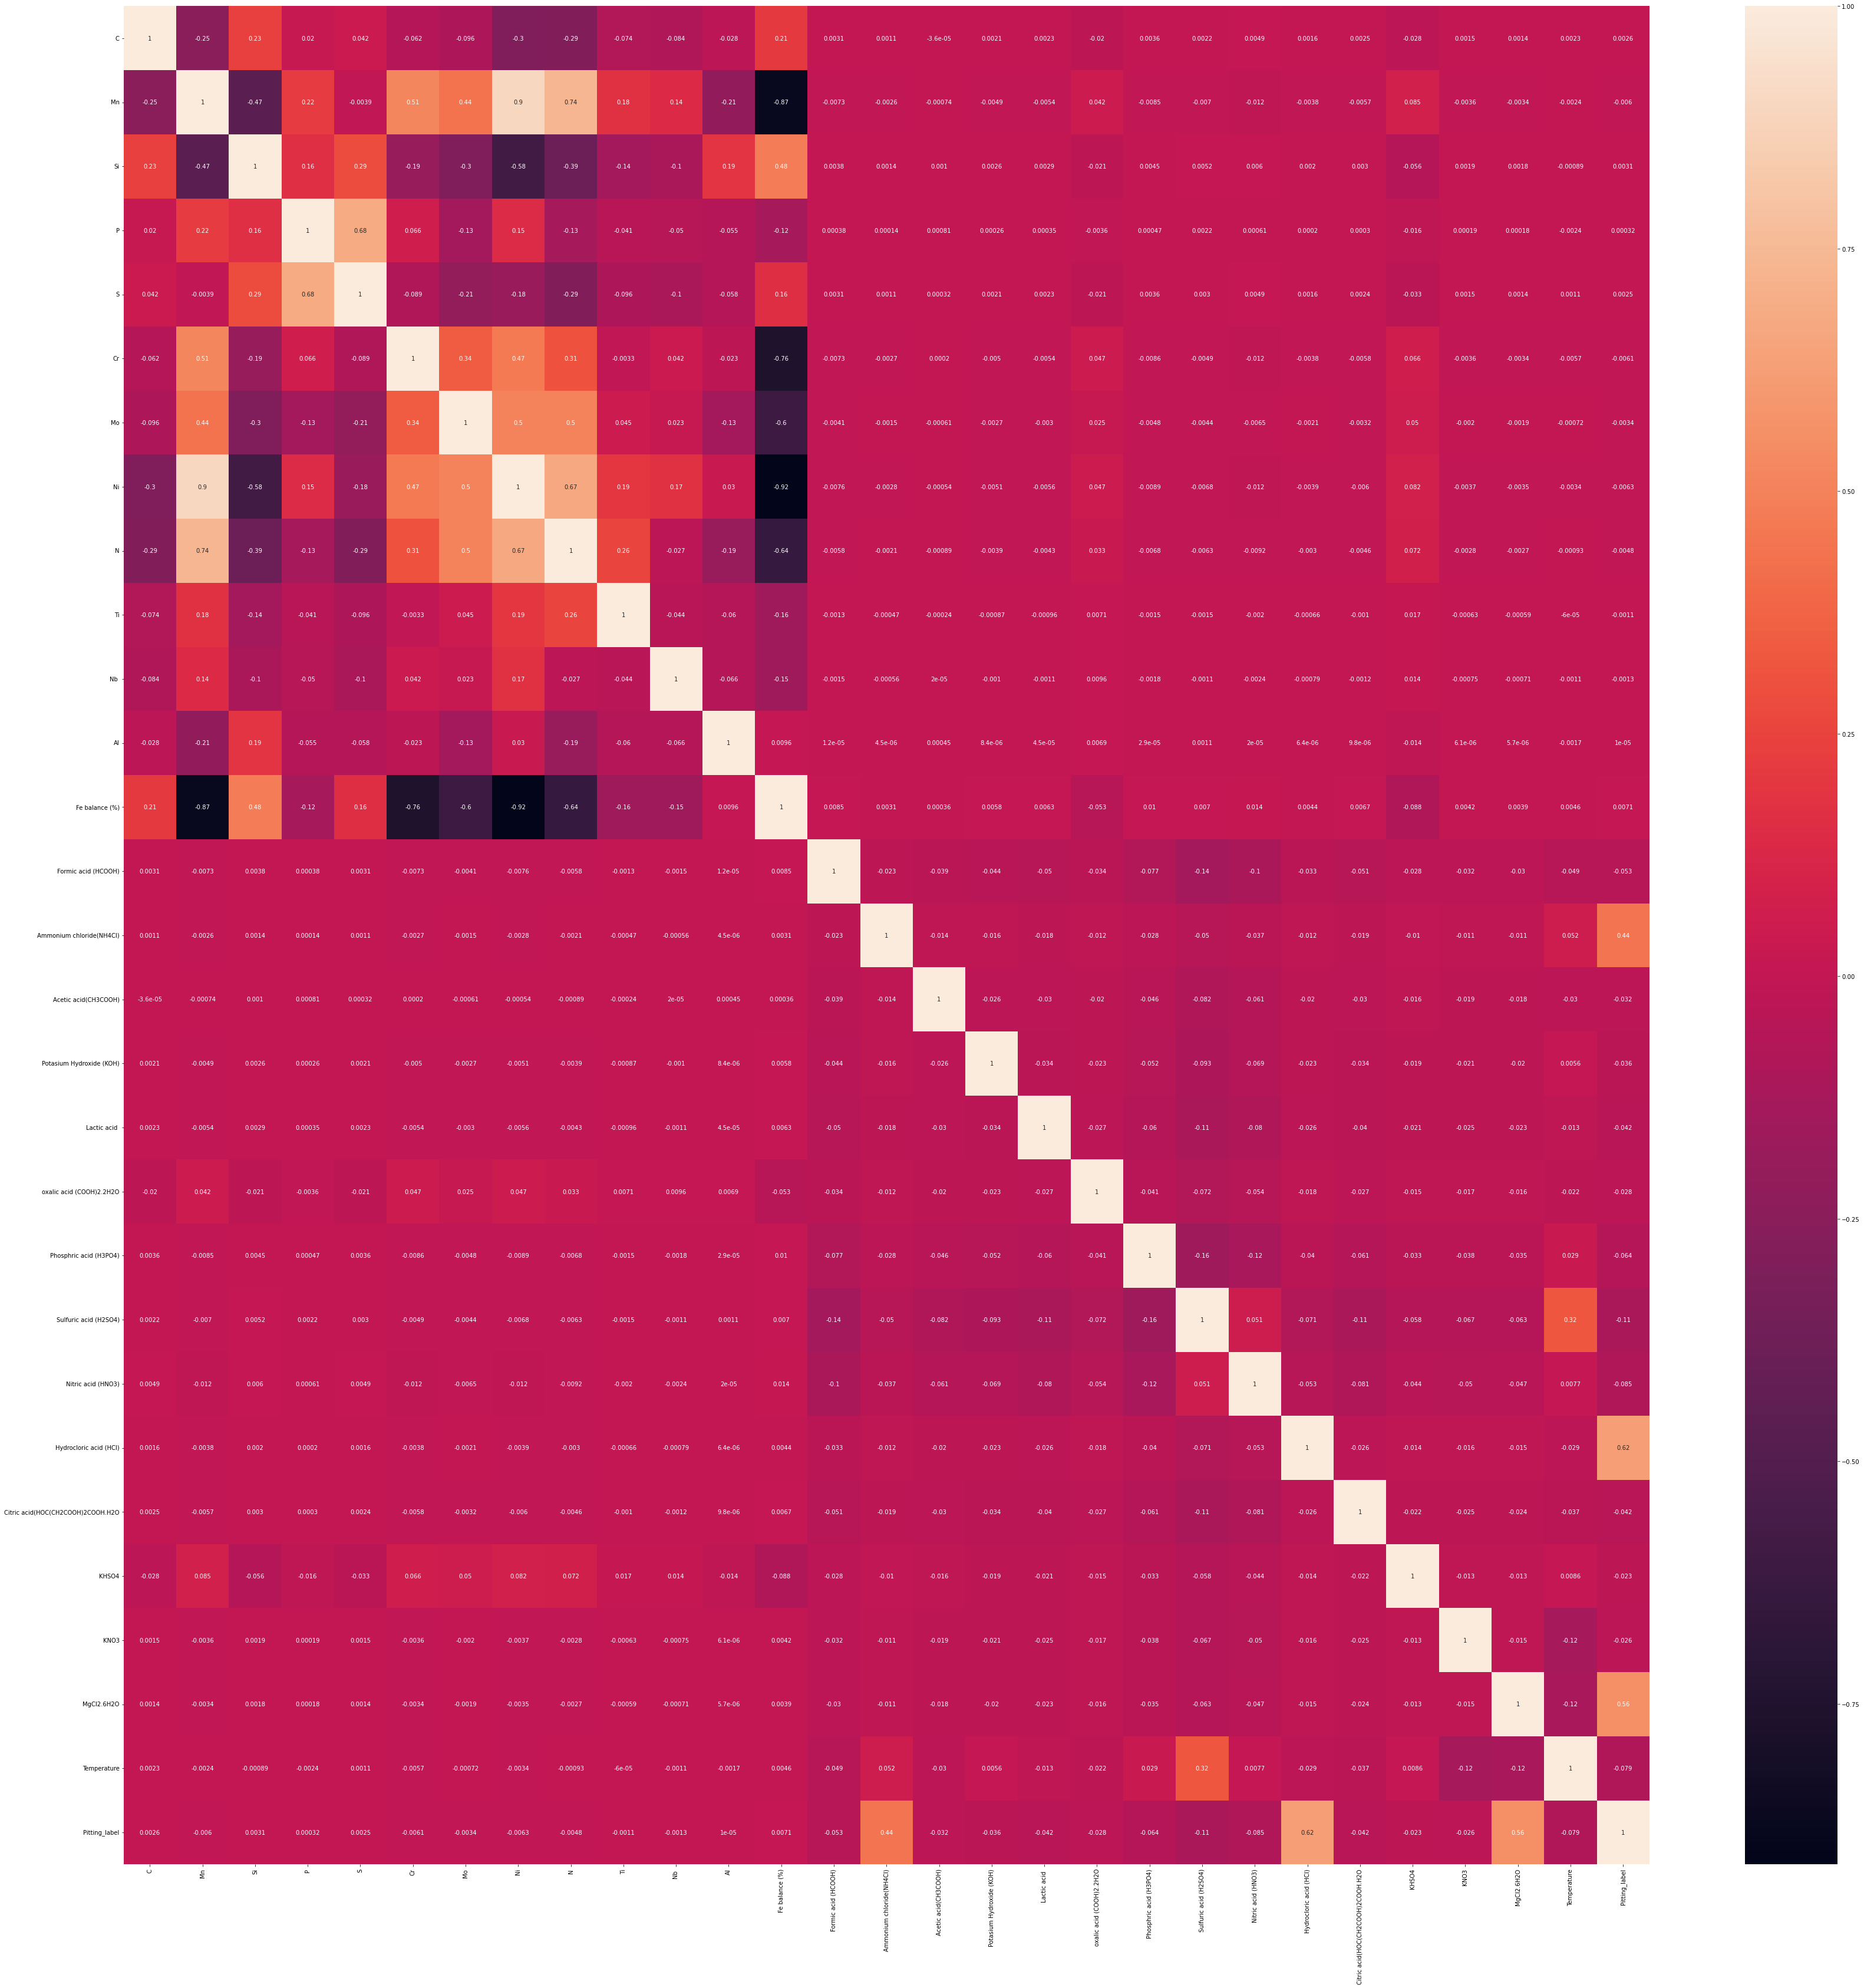

In [13]:
fig = plt.figure(figsize = (58, 58))
sns.heatmap(df.corr(), annot =True )
# sns.set(rc = {'figure.figsize':(58,58)})#<--responsible for changing the size of a seaborn plot
plt.show()